In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,plot_roc_curve,recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering

# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

In [214]:
# Load the data.
df = pd.read_csv('bank_marketing_part1_Data.csv')

## 1.1
Read the data and do exploratory data analysis (3 pts). Describe the data briefly. Interpret the inferences for each (3 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [215]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [217]:
df.shape

(210, 7)

In [218]:
df.duplicated().sum()

0

In [219]:
df.isna().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [220]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


<b>Data Visualization - Uni Variate Analysis</b>

<AxesSubplot:xlabel='max_spent_in_single_shopping'>

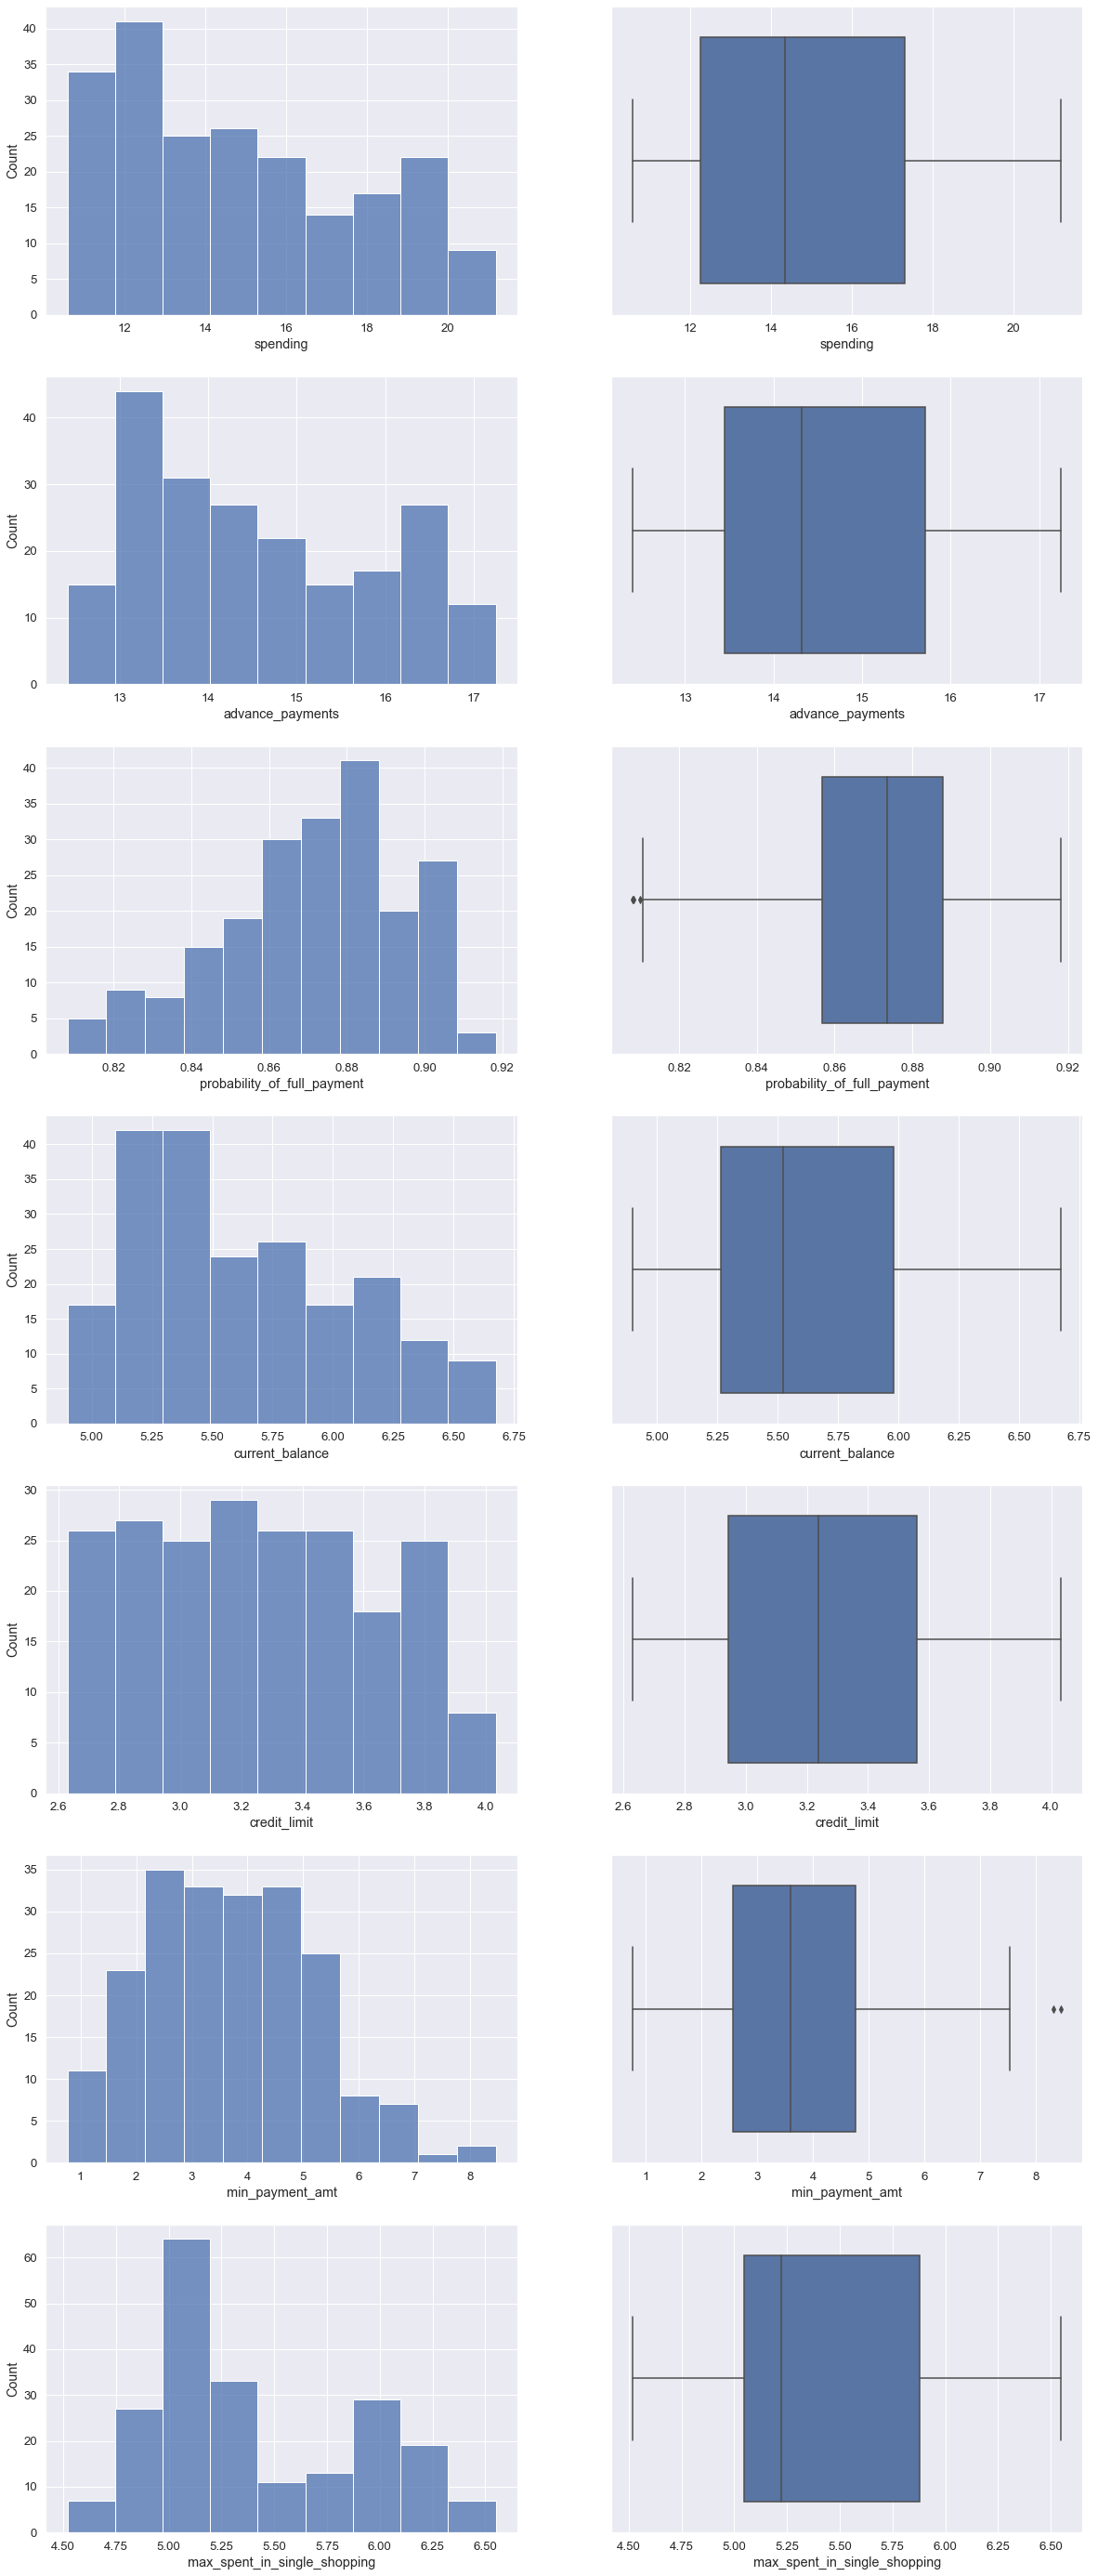

In [221]:
fig_dims = (20, 50) 
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=fig_dims) 

sns.histplot(df.spending, kde=False, ax=axs[0][0]) 
sns.boxplot(x= 'spending', data=df, ax=axs[0][1])

sns.histplot(df.advance_payments, kde=False, ax=axs[1][0]) 
sns.boxplot(x= 'advance_payments', data=df, ax=axs[1][1])

sns.histplot(df.probability_of_full_payment, kde=False, ax=axs[2][0]) 
sns.boxplot(x= 'probability_of_full_payment', data=df, ax=axs[2][1])

sns.histplot(df.current_balance, kde=False, ax=axs[3][0]) 
sns.boxplot(x= 'current_balance', data=df, ax=axs[3][1])

sns.histplot(df.credit_limit, kde=False, ax=axs[4][0]) 
sns.boxplot(x= 'credit_limit', data=df, ax=axs[4][1])

sns.histplot(df.min_payment_amt, kde=False, ax=axs[5][0]) 
sns.boxplot(x= 'min_payment_amt', data=df, ax=axs[5][1])

sns.histplot(df.max_spent_in_single_shopping, kde=False, ax=axs[6][0]) 
sns.boxplot(x= 'max_spent_in_single_shopping', data=df, ax=axs[6][1])

<AxesSubplot:>

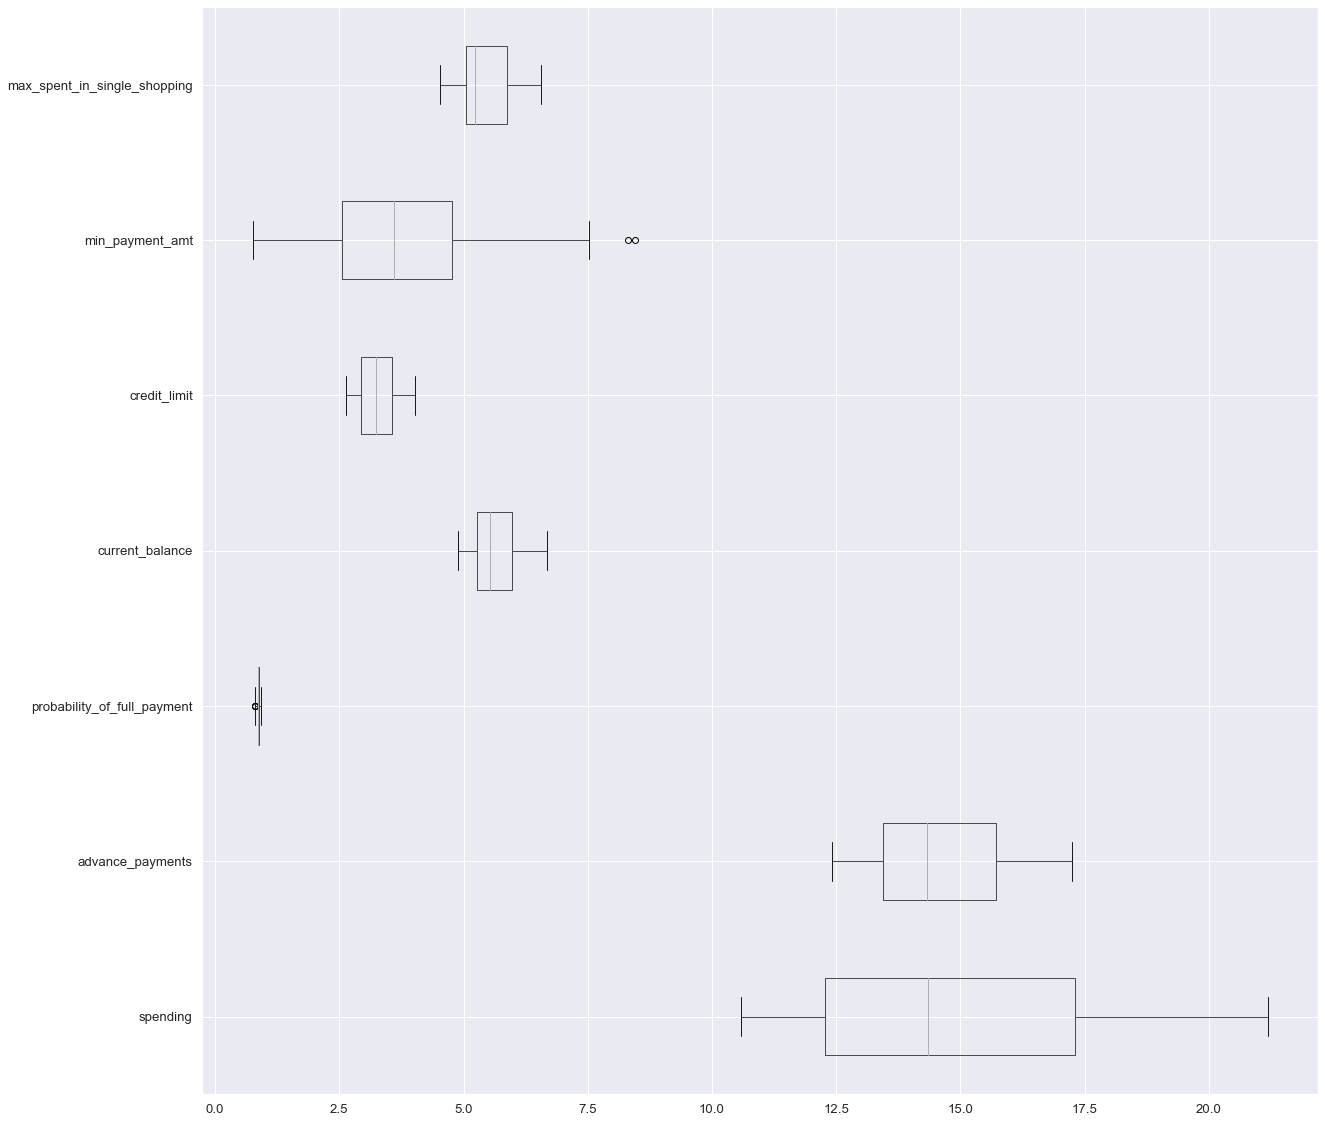

In [222]:
plt.figure(figsize=(20,20))
df.boxplot(vert=0)

<Figure size 1440x1440 with 0 Axes>

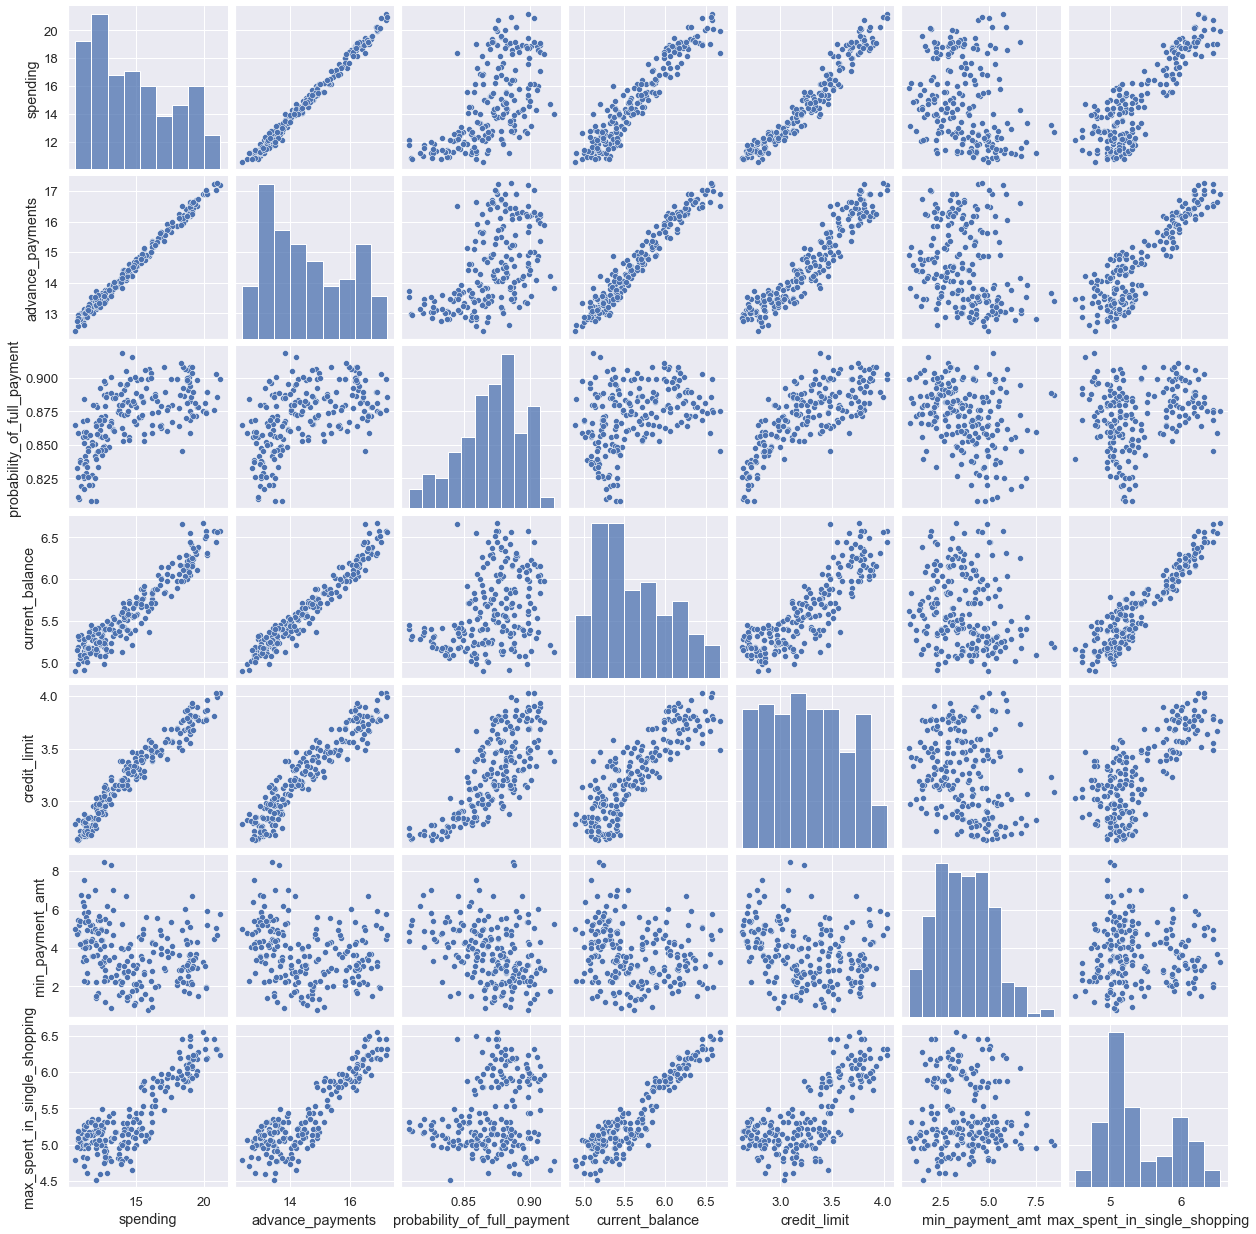

In [223]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.2)
sns.pairplot(df)

<AxesSubplot:>

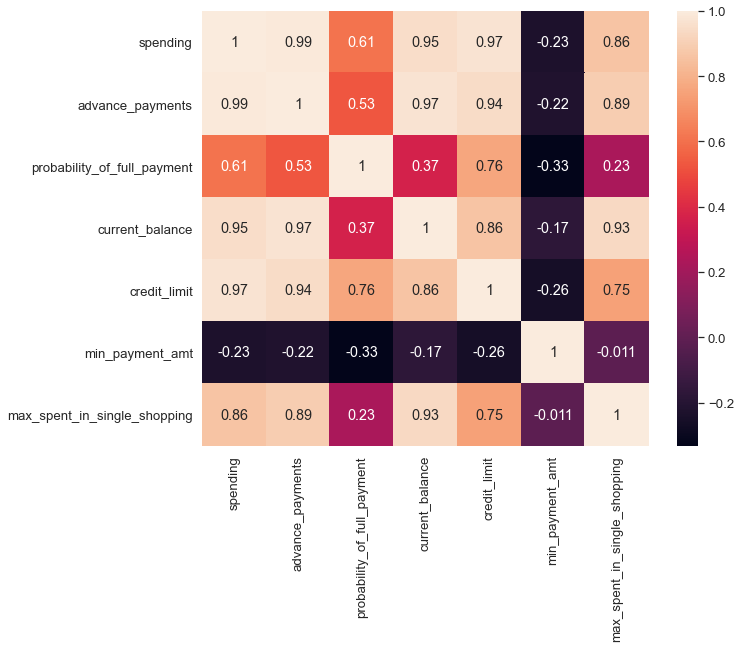

In [224]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True)

## 1.2 

Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.

<b>Scale using StandardScaler</b>

In [225]:
x = StandardScaler()
scaledDf = x.fit_transform(df)
scaledDf

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

In [226]:
scaledDf = pd.DataFrame(scaledDf, index=df.index, columns = df.columns)
scaledDf

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


In [227]:
scaledDf.describe().round(0)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.0,210.0,210.0,210.0,210.0,210.0,210.0
mean,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-2.0,-3.0,-2.0,-2.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,2.0,2.0,2.0,2.0,2.0,3.0,2.0


<b>Scale using zscore</b>

In [228]:
scaledDf = df.apply(zscore)
scaledDf.head()
scaledDf.describe().round(0)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.0,210.0,210.0,210.0,210.0,210.0,210.0
mean,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.0,-2.0,-3.0,-2.0,-2.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,2.0,2.0,2.0,2.0,2.0,3.0,2.0


In [229]:
scaledDf

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


## 1.3 

Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.

### FClustering

In [230]:
link_method = linkage(scaledDf, method='ward', metric='euclidean')

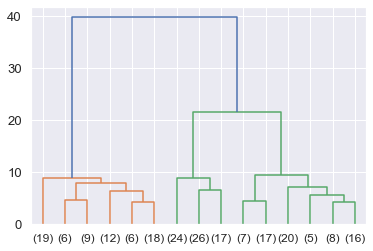

In [231]:
dend = dendrogram(link_method, truncate_mode='lastp', p=15)

In [232]:
maxclusters = fcluster(link_method, 3, criterion='maxclust')
maxclusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [233]:
df['cluster'] = maxclusters
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


#### Cluster frequency

In [234]:
df.cluster.value_counts().sort_index()

1    70
2    67
3    73
Name: cluster, dtype: int64

<AxesSubplot:>

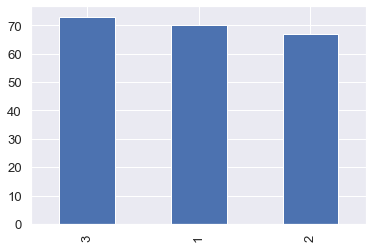

In [235]:
df.cluster.value_counts().plot.bar()

In [236]:
df.cluster.value_counts(1).sort_index()

1    0.333333
2    0.319048
3    0.347619
Name: cluster, dtype: float64

#### Cluster Profiles

In [237]:
aggdata = df.groupby('cluster').mean()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178


### Agglomerative Clustering

In [238]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, 
                                  affinity='euclidean', 
                                  linkage='ward')
cluster_agglo=cluster.fit_predict(scaledDf)
print(cluster_agglo)

[1 0 1 2 1 2 2 0 1 2 1 0 2 1 0 2 0 2 0 2 2 2 1 2 0 1 0 2 2 2 0 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 0 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 0 0 1 1 2 0 1 0 2 2 1 1 1 2 1 2 1 0 1 0 1 1 2 2 1 0
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 0 2 1 2
 0 2 0 2 0 0 0 0 0 2 0 1 1 2 1 1 1 2 1 0 0 0 0 2 0 1 1 1 0 0 1 2 0 0 0 0 1
 1 0 0 0 2 0 0 2 1 0 1 1 2 1 2 0 1 0 2 1 0 1 0 1 0]


In [239]:
df["Agglo_Clusters"] = cluster_agglo

In [240]:
df

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster,Agglo_Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1
...,...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,3,0
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795,1,1
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,3,0
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,1,1


In [241]:
agglo_data=df.drop('cluster', axis=1).groupby('Agglo_Clusters').mean()
agglo_data['Freq']=df.Agglo_Clusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_Clusters,,,,,,,,
0,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67


In [242]:
df.Agglo_Clusters.value_counts().sort_index()

0    73
1    70
2    67
Name: Agglo_Clusters, dtype: int64

<AxesSubplot:>

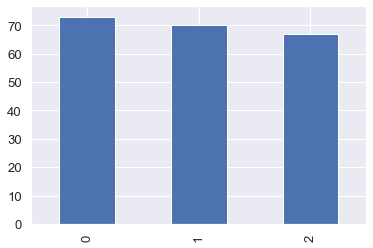

In [243]:
df.Agglo_Clusters.value_counts().plot.bar()

In [244]:
df.Agglo_Clusters.value_counts(1).sort_index()

0    0.347619
1    0.333333
2    0.319048
Name: Agglo_Clusters, dtype: float64

### K-Means Clustering

In [245]:
k_means = KMeans(n_clusters=2, random_state=1)
k_means.fit(scaledDf)
labels_2 = k_means.labels_
labels_2

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [246]:
k_means.inertia_

659.171754487041

In [247]:
k_means = KMeans(n_clusters=3, random_state=1)
k_means.fit(scaledDf)
print(k_means.inertia_)
labels_3 = k_means.labels_
labels_3

430.6589731513006


array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [248]:
wss = []

for i in range(1, 15):
    k_means = KMeans(n_clusters=i, random_state=1)
    k_means.fit(scaledDf)
    wss.append(k_means.inertia_)
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.38509060801096,
 327.21278165661346,
 289.31599538959495,
 262.98186570162267,
 241.81894656086033,
 223.91254221002725,
 206.39612184786694,
 193.2835133180646,
 182.97995389115258,
 175.11842017053073,
 166.02965682631788]

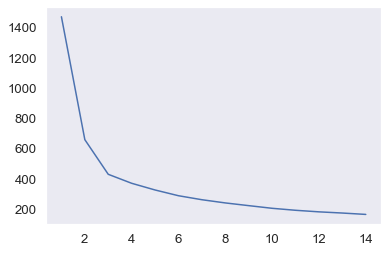

In [249]:
plt.plot(range(1, 15), wss)
plt.grid()
plt.show()

In [250]:
from sklearn.metrics import silhouette_samples, silhouette_score

print('Sil Score for 2 Clusters' , silhouette_score(scaledDf, labels_2).round(2))
print('Sil Score for 3 Clusters' , silhouette_score(scaledDf, labels_3).round(2))

Sil Score for 2 Clusters 0.47
Sil Score for 3 Clusters 0.4


In [251]:
print('Silhouette sample min for 2 clusters', silhouette_samples(scaledDf, labels_2).min().round(0))
print('Silhouette sample min for 3 clusters', silhouette_samples(scaledDf, labels_3).min().round(0))

Silhouette sample min for 2 clusters -0.0
Silhouette sample min for 3 clusters 0.0


In [252]:
df['KMeans_Clusters'] = labels_3

In [253]:
df.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster,Agglo_Clusters,KMeans_Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,2
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000,2,2,1
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2,2,1
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825,3,0,0
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273,1,1,2
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2,2,1


In [254]:
aggdata=df.drop(['cluster', 'Agglo_Clusters'], axis=1).groupby('KMeans_Clusters').mean()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
KMeans_Clusters,,,,,,,
0,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803
1,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722
2,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701


<Figure size 1440x1440 with 0 Axes>

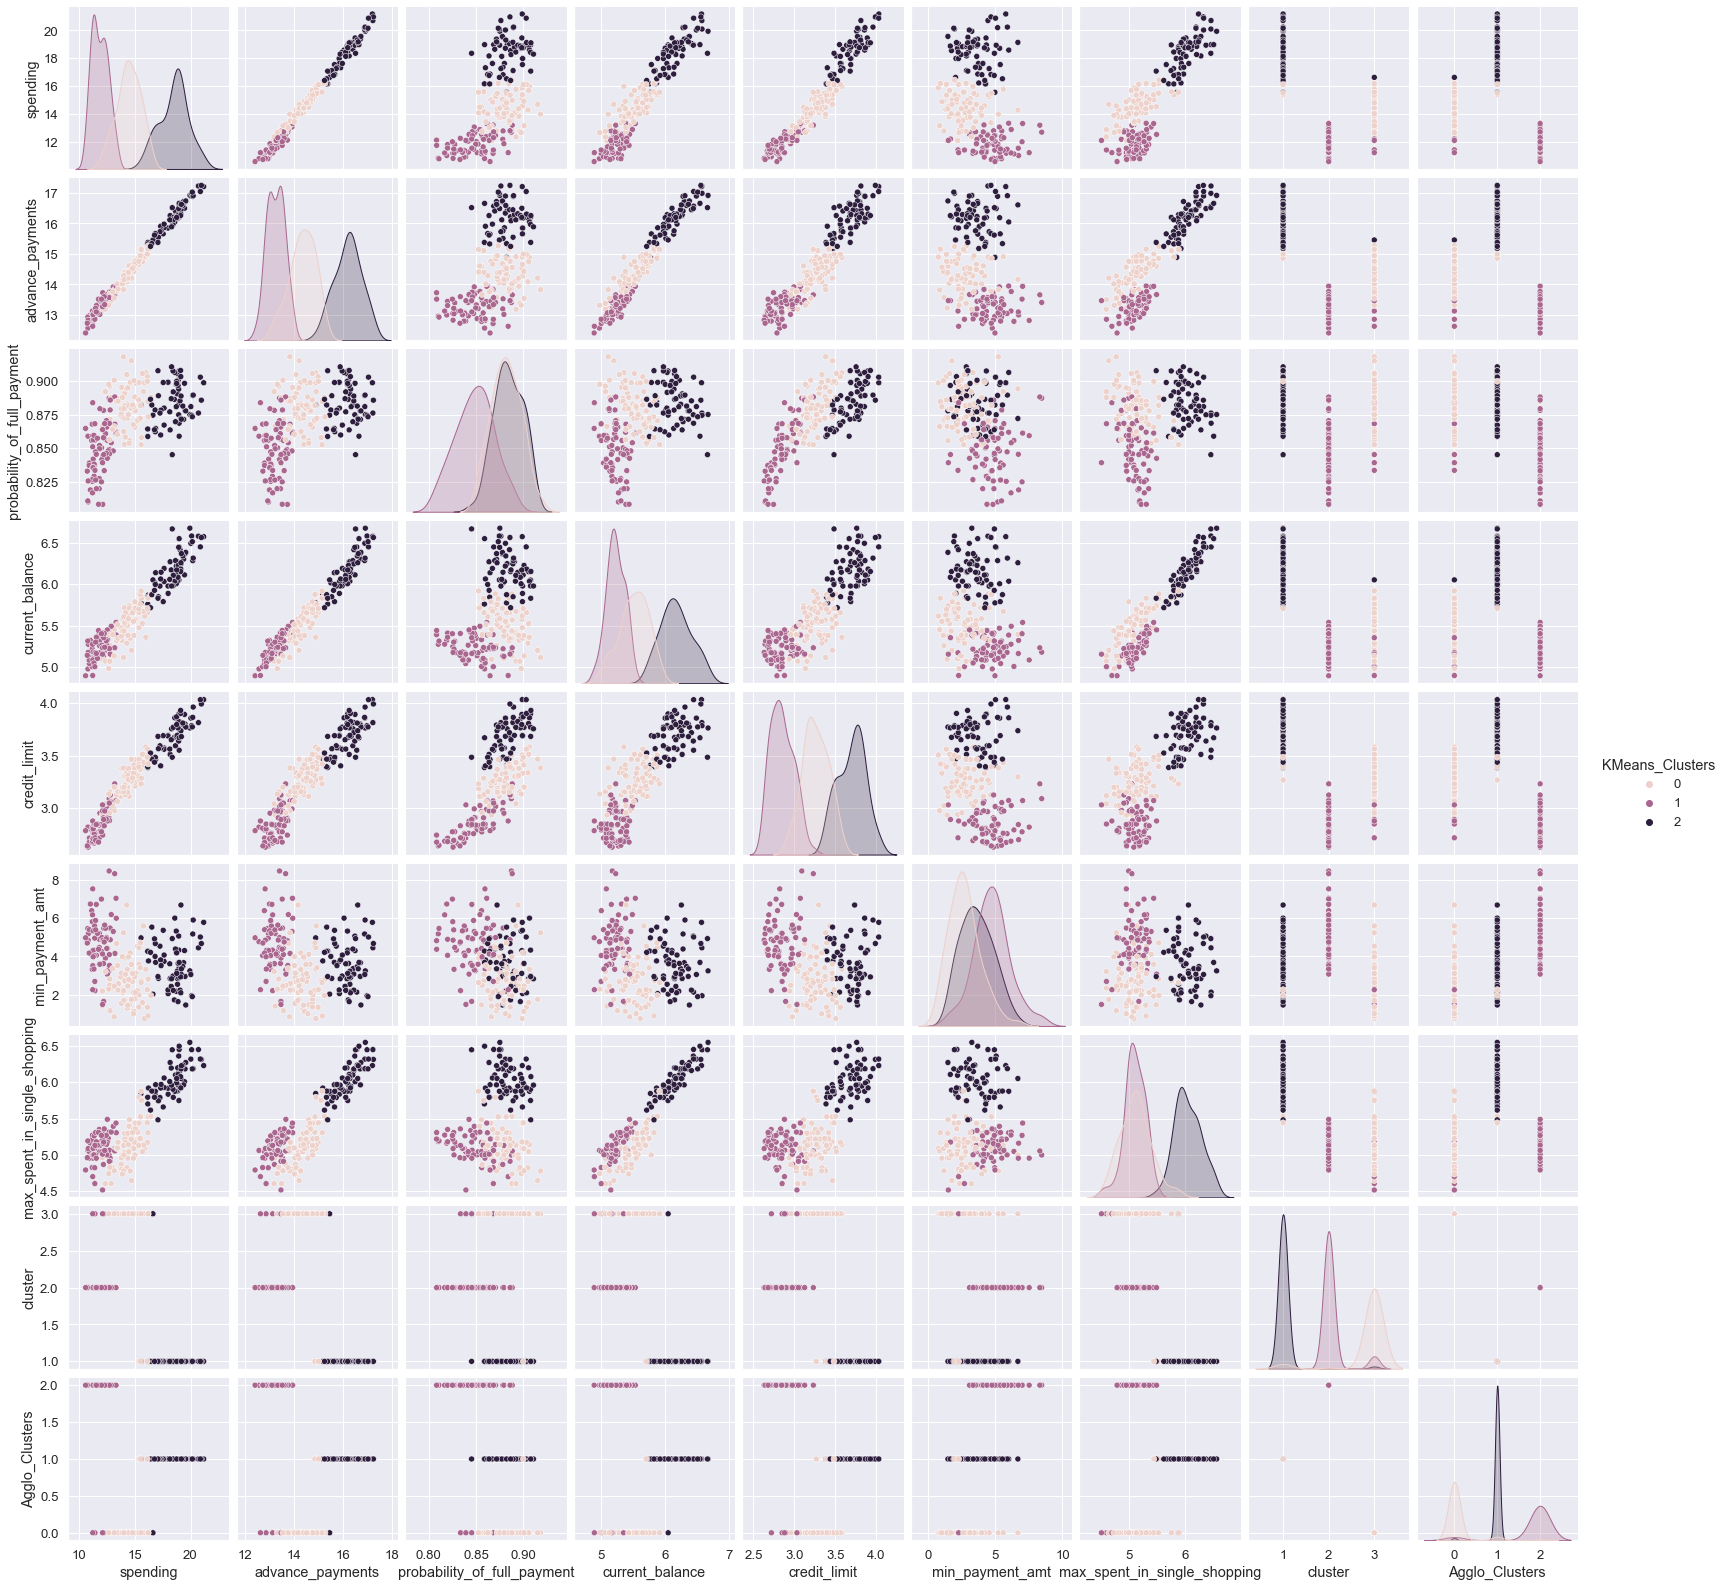

In [255]:
# fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
# sns.scatterplot(x='KMeans_Clusters', y='spending', data=df, hue='KMeans_Clusters', ax=axes[0][1])
# sns.scatterplot(x='KMeans_Clusters', y='advance_payments', data=df, ax=axes[0][1])
# sns.scatterplot(x='KMeans_Clusters', y='probability_of_full_payment', data=df, ax=axes[1][0])
# sns.scatterplot(x='KMeans_Clusters', y='current_balance', data=df, ax=axes[1][1])
# sns.scatterplot(x='KMeans_Clusters', y='credit_limit', data=df, ax=axes[2][0])
# sns.scatterplot(x='KMeans_Clusters', y='min_payment_amt', data=df, ax=axes[2][1])
# sns.scatterplot(x='KMeans_Clusters', y='max_spent_in_single_shopping', data=df, ax=axes[3][0])
plt.figure(figsize=(20,20))
sns.set(font_scale=1.2)
sns.pairplot(df, hue='KMeans_Clusters')

In [256]:
df.KMeans_Clusters.value_counts().sort_index()

0    71
1    72
2    67
Name: KMeans_Clusters, dtype: int64

In [257]:
df.KMeans_Clusters.value_counts(1)

1    0.342857
0    0.338095
2    0.319048
Name: KMeans_Clusters, dtype: float64

<AxesSubplot:>

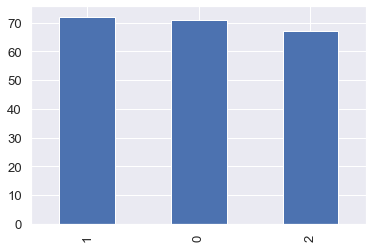

In [258]:
df.KMeans_Clusters.value_counts().plot.bar()

# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.


In [259]:
df = pd.read_csv('insurance_part2_data.csv')

### EDA

In [260]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [262]:
df.shape

(3000, 10)

In [263]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [264]:
df.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [265]:
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [266]:
df.duplicated().sum()

139

In [267]:
df[df.Duration <=0]

df.drop(axis=0, index=1508, inplace=True)
df.drop(axis=0, index=1746, inplace=True)
df.drop(axis=0, index=2628, inplace=True)

In [268]:
df[df.Duration <=0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [269]:
df[df.Sales <= 1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
131,53,JZI,Airlines,No,12.95,Online,93,0.0,Bronze Plan,ASIA
162,36,EPX,Travel Agency,No,0.00,Online,2,0.0,Customised Plan,ASIA
323,54,CWT,Travel Agency,No,100.98,Online,18,0.0,Customised Plan,Americas
483,44,CWT,Travel Agency,No,11.88,Online,10,0.0,Customised Plan,ASIA
513,31,CWT,Travel Agency,No,83.16,Online,99,0.0,Customised Plan,EUROPE
...,...,...,...,...,...,...,...,...,...,...
2870,36,EPX,Travel Agency,No,0.00,Online,43,0.0,Cancellation Plan,ASIA
2871,36,EPX,Travel Agency,No,0.00,Online,2,0.0,Customised Plan,ASIA
2919,27,CWT,Travel Agency,No,17.82,Online,6,0.0,Customised Plan,Americas
2966,30,CWT,Travel Agency,No,17.82,Online,20,0.0,Customised Plan,ASIA


In [270]:
df[df.Commision <=0]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1,36,EPX,Travel Agency,No,0.0,Online,34,20.0,Customised Plan,ASIA
3,36,EPX,Travel Agency,No,0.0,Online,4,26.0,Cancellation Plan,ASIA
7,36,EPX,Travel Agency,No,0.0,Online,16,80.0,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.0,Online,19,14.0,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.0,Online,42,43.0,Cancellation Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2988,36,EPX,Travel Agency,Yes,0.0,Online,18,36.0,Customised Plan,ASIA
2989,35,EPX,Travel Agency,No,0.0,Online,26,20.0,Customised Plan,ASIA
2990,51,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
2993,36,EPX,Travel Agency,No,0.0,Online,234,10.0,Cancellation Plan,ASIA


In [271]:
df[df.Claimed =='No'][df.Sales <= 0]

<ipython-input-271-4652dfc60731>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.Claimed =='No'][df.Sales <= 0]


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
131,53,JZI,Airlines,No,12.95,Online,93,0.0,Bronze Plan,ASIA
162,36,EPX,Travel Agency,No,0.00,Online,2,0.0,Customised Plan,ASIA
323,54,CWT,Travel Agency,No,100.98,Online,18,0.0,Customised Plan,Americas
483,44,CWT,Travel Agency,No,11.88,Online,10,0.0,Customised Plan,ASIA
513,31,CWT,Travel Agency,No,83.16,Online,99,0.0,Customised Plan,EUROPE
537,34,CWT,Travel Agency,No,11.88,Online,45,0.0,Customised Plan,ASIA
612,33,CWT,Travel Agency,No,17.82,Online,4,0.0,Customised Plan,ASIA
646,31,CWT,Travel Agency,No,11.88,Online,144,0.0,Customised Plan,ASIA
703,30,JZI,Airlines,No,7.70,Online,9,0.0,Bronze Plan,ASIA
766,36,EPX,Travel Agency,No,0.00,Online,7,0.0,Cancellation Plan,ASIA


In [272]:
# Finding anomalies
df_cat = df.select_dtypes(['object'])
df_num = df.select_dtypes(['int64', 'float64'])


In [273]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        2997 non-null   int64  
 1   Commision  2997 non-null   float64
 2   Duration   2997 non-null   int64  
 3   Sales      2997 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 197.1 KB


In [274]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Agency_Code   2997 non-null   object
 1   Type          2997 non-null   object
 2   Claimed       2997 non-null   object
 3   Channel       2997 non-null   object
 4   Product Name  2997 non-null   object
 5   Destination   2997 non-null   object
dtypes: object(6)
memory usage: 243.9+ KB


In [275]:
df_cat.isnull().sum()

Agency_Code     0
Type            0
Claimed         0
Channel         0
Product Name    0
Destination     0
dtype: int64

In [276]:
df_num.isnull().sum()

Age          0
Commision    0
Duration     0
Sales        0
dtype: int64

In [277]:
df_cat.isna().sum()

Agency_Code     0
Type            0
Claimed         0
Channel         0
Product Name    0
Destination     0
dtype: int64

In [278]:
df_cat.Agency_Code.value_counts()

EPX    1365
C2B     922
CWT     472
JZI     238
Name: Agency_Code, dtype: int64

In [279]:
df_cat.Type.value_counts()

Travel Agency    1837
Airlines         1160
Name: Type, dtype: int64

In [280]:
df_cat.Claimed.value_counts(1)

No     0.691692
Yes    0.308308
Name: Claimed, dtype: float64

In [281]:
df_cat.Channel.value_counts()

Online     2951
Offline      46
Name: Channel, dtype: int64

In [282]:
df_cat['Product Name'].value_counts()

Customised Plan      1135
Cancellation Plan     678
Bronze Plan           648
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64

In [283]:
df_cat.Destination.value_counts()

ASIA        2462
Americas     320
EUROPE       215
Name: Destination, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Destination', ylabel='count'>

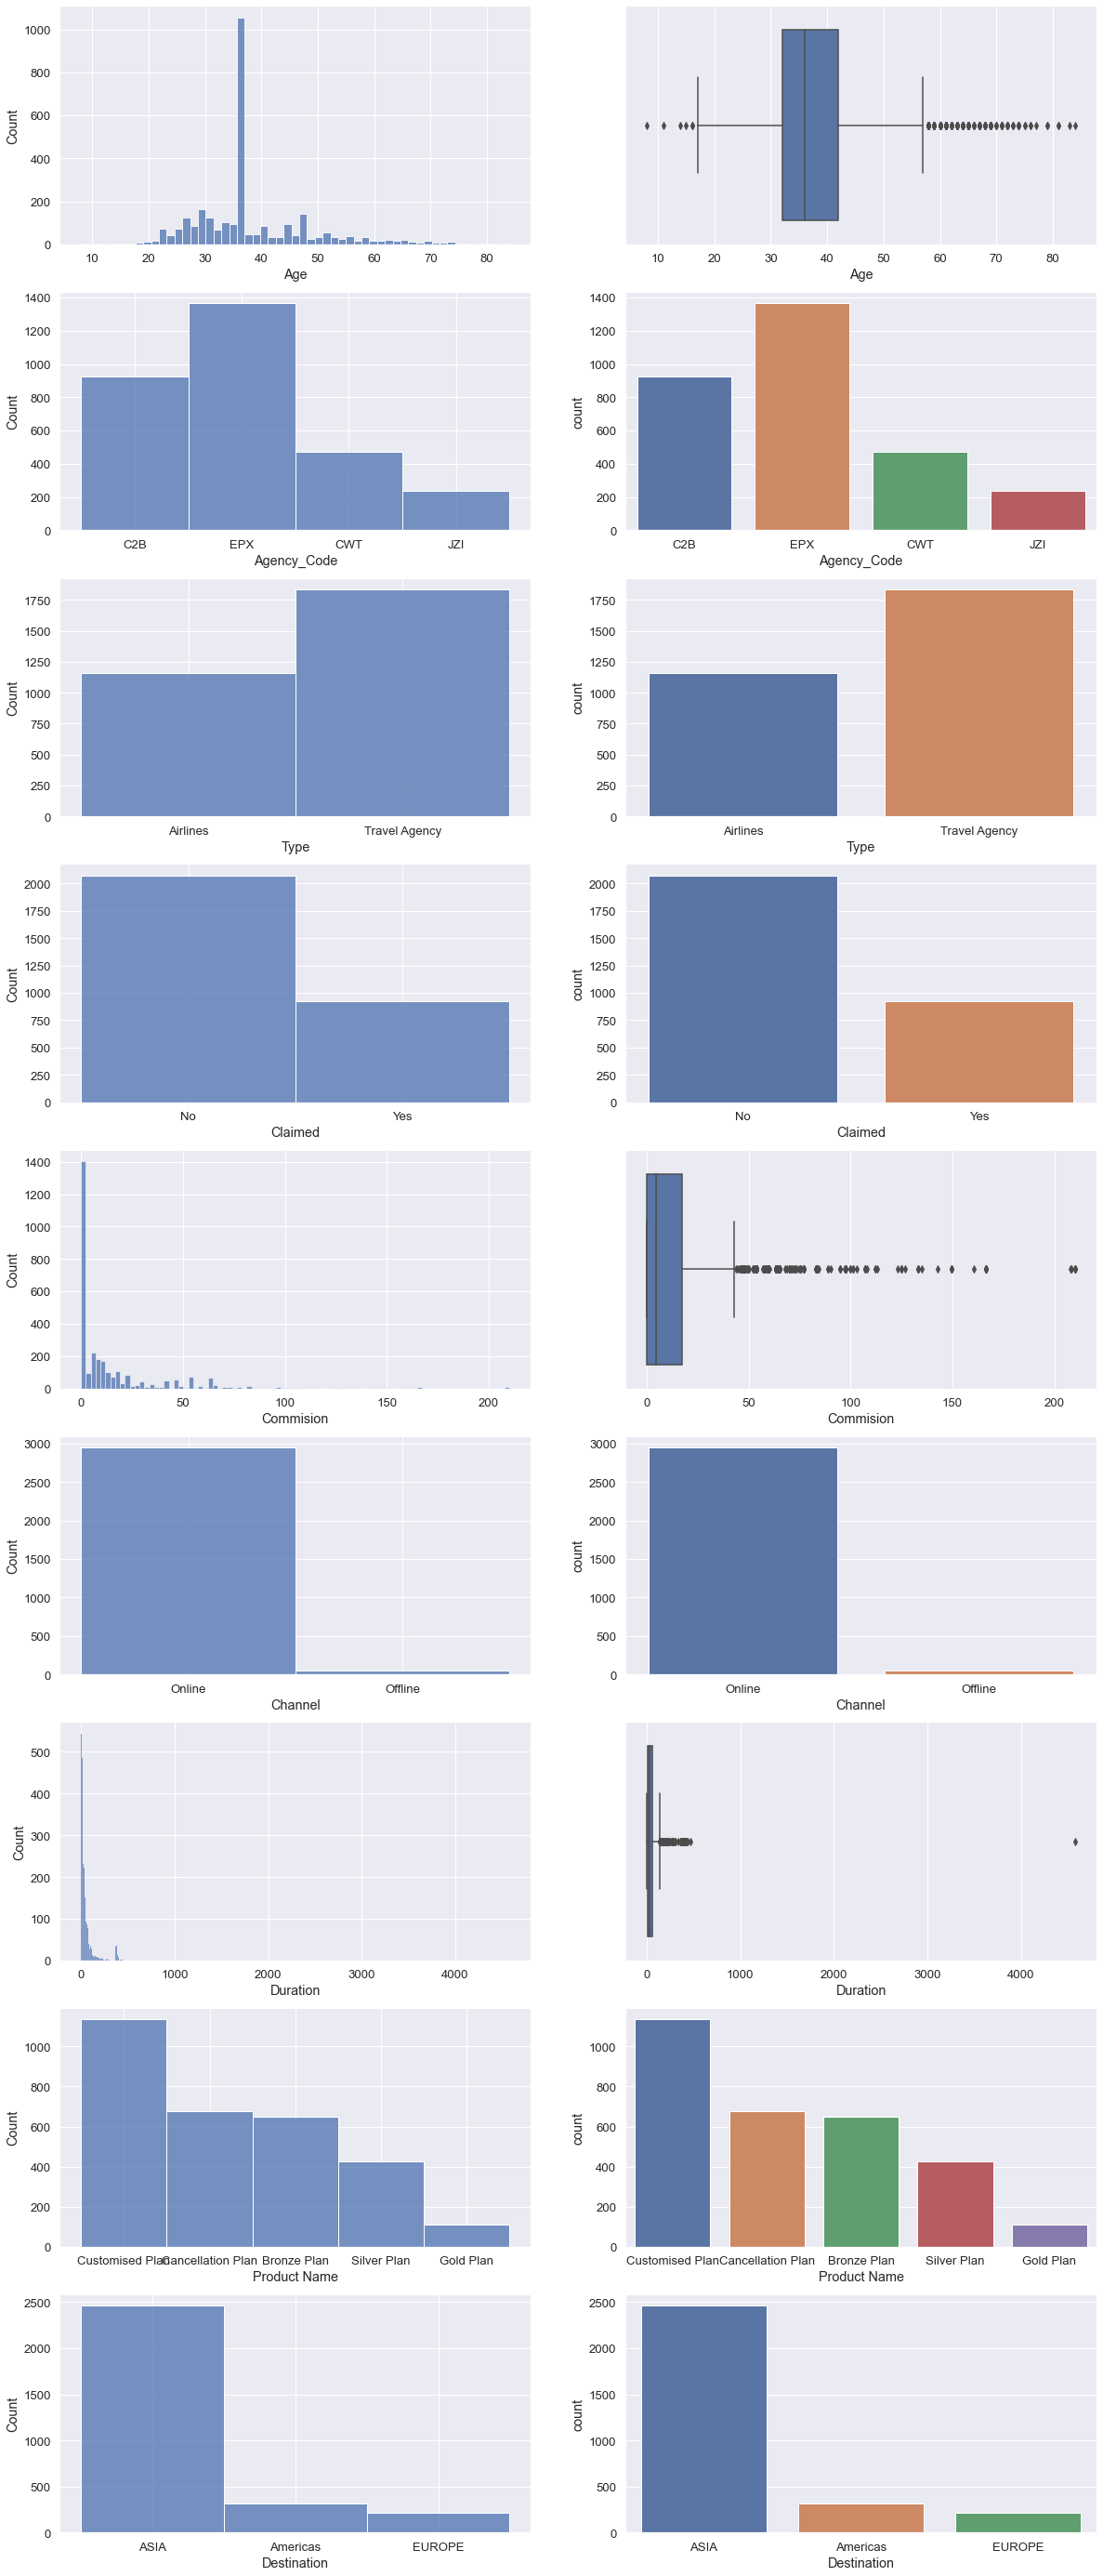

In [284]:
fig_dims = (20, 50) 
fig, axs = plt.subplots(nrows=9, ncols=2, figsize=fig_dims) 

sns.histplot(df.Age, kde=False, ax=axs[0][0]) 
sns.boxplot(x= 'Age', data=df, ax=axs[0][1])

sns.histplot(df.Agency_Code, kde=False, ax=axs[1][0]) 
sns.countplot(x= 'Agency_Code', data=df, ax=axs[1][1])

sns.histplot(df.Type, kde=False, ax=axs[2][0]) 
sns.countplot(x= 'Type', data=df, ax=axs[2][1])

sns.histplot(df.Claimed, kde=False, ax=axs[3][0]) 
sns.countplot(x= 'Claimed', data=df, ax=axs[3][1])

sns.histplot(df.Commision, kde=False, ax=axs[4][0]) 
sns.boxplot(x= 'Commision', data=df, ax=axs[4][1])

sns.histplot(df.Channel, kde=False, ax=axs[5][0]) 
sns.countplot(x= 'Channel', data=df, ax=axs[5][1])

sns.histplot(df.Duration, kde=False, ax=axs[6][0]) 
sns.boxplot(x= 'Duration', data=df, ax=axs[6][1])

sns.histplot(df['Product Name'], kde=False, ax=axs[7][0]) 
sns.countplot(x= 'Product Name', data=df, ax=axs[7][1])

sns.histplot(df.Destination, kde=False, ax=axs[8][0]) 
sns.countplot(x= 'Destination', data=df, ax=axs[8][1])

<AxesSubplot:>

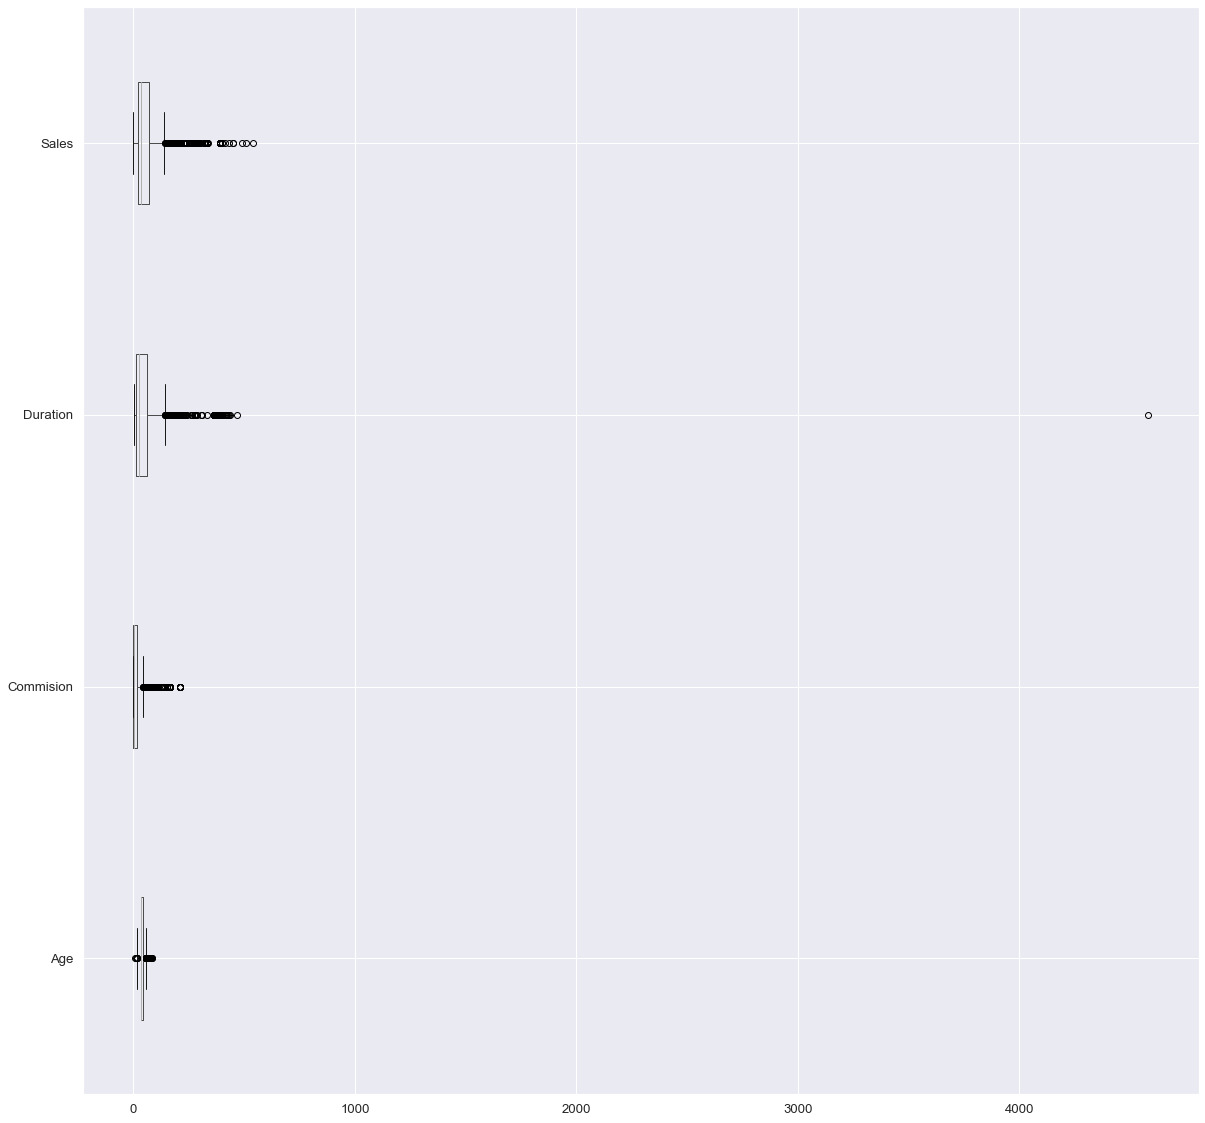

In [285]:
plt.figure(figsize=(20,20))
df.boxplot(vert=0)

<Figure size 1440x1440 with 0 Axes>

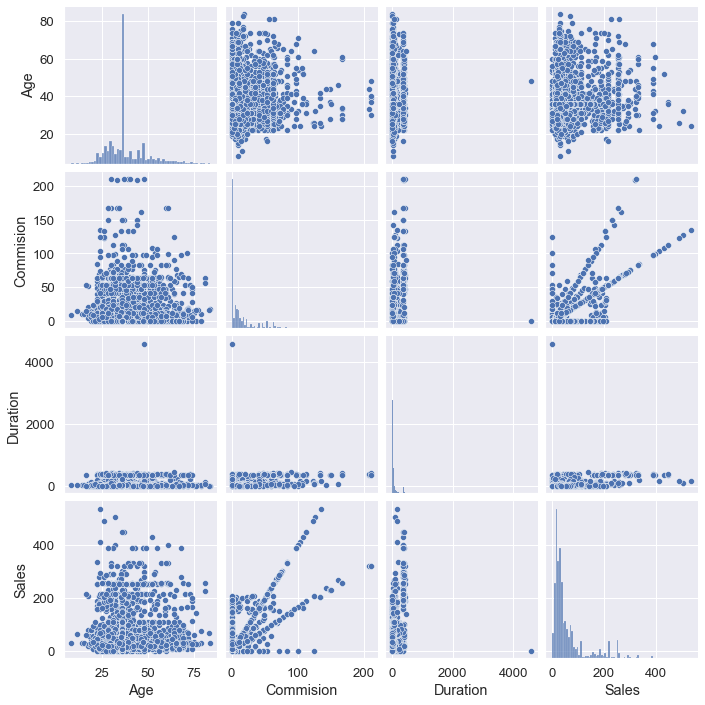

In [286]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.2)
sns.pairplot(df)

<AxesSubplot:>

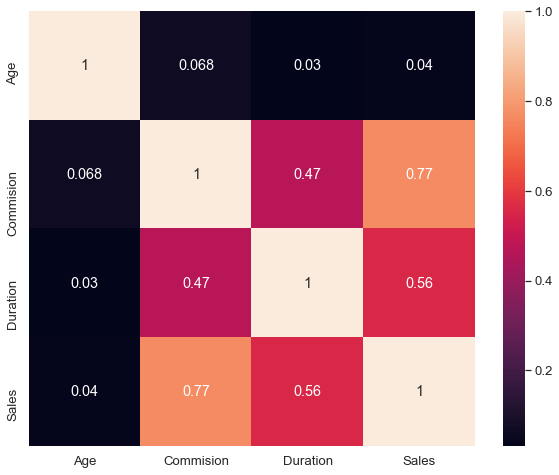

In [287]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(), annot=True)

#### Converting All Objects to Categorical Codes

In [288]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code


feature: Type


feature: Claimed


feature: Channel


feature: Product Name


feature: Destination


In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2997 non-null   int64  
 1   Agency_Code   2997 non-null   int8   
 2   Type          2997 non-null   int8   
 3   Claimed       2997 non-null   int8   
 4   Commision     2997 non-null   float64
 5   Channel       2997 non-null   int8   
 6   Duration      2997 non-null   int64  
 7   Sales         2997 non-null   float64
 8   Product Name  2997 non-null   int8   
 9   Destination   2997 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 214.6 KB


In [290]:
df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0
5,45,3,0,1,15.75,1,8,45.00,0,0
6,61,1,1,0,35.64,1,30,59.40,2,1
7,36,2,1,0,0.00,1,16,80.00,1,0
8,36,2,1,0,0.00,1,19,14.00,1,0
9,36,2,1,0,0.00,1,42,43.00,1,0


In [291]:
# Proportions of 1s and 0s

df.Claimed.value_counts(1)

0    0.691692
1    0.308308
Name: Claimed, dtype: float64

Extracting the target column into separate vectors for training set and test set

In [292]:
x = df.drop('Claimed', axis=1)

y = df.pop('Claimed')

x.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [293]:
from sklearn.model_selection import train_test_split

In [294]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [295]:
# Checking the dimensions of the training and test data ensuring the split

print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (2097, 9)
x_test (900, 9)
y_train (2097,)
y_test (900,)


### Building a Decision Tree Classifier



In [296]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [297]:
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 150}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=150,
                       random_state=1)

#### Generating Tree

In [298]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [299]:
# Variable Importance

print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.614926
Sales         0.209699
Commision     0.079993
Duration      0.035289
Product Name  0.028952
Age           0.020218
Destination   0.010923
Type          0.000000
Channel       0.000000


In [300]:
#  Predicting on Training and Test dataset

ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [301]:
# Getting predicted classes and probabilities

ytest_predict
ytest_predict_prob=best_grid.predict_proba(x_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.942308,0.057692
1,0.892473,0.107527
2,0.953846,0.046154
3,0.946429,0.053571
4,0.830508,0.169492


AUC: 0.833


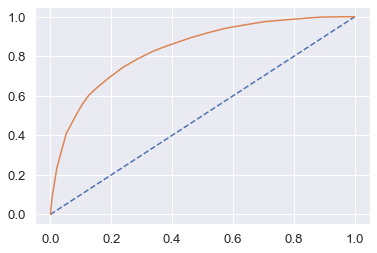

In [302]:
# Model Evaluation

# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.804


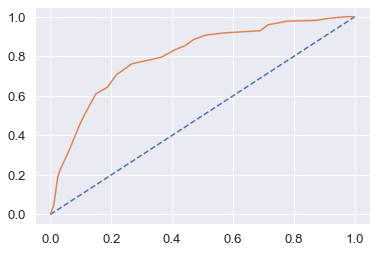

In [303]:
# AUC and ROC for the test data

# predict probabilities
probs = best_grid.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [304]:
# Confusion Matrix for the training data

confusion_matrix(y_train, ytrain_predict)

array([[1290,  152],
       [ 289,  366]], dtype=int64)

In [305]:
#Train Data Accuracy

cart_train_acc = best_grid.score(x_train, y_train)
cart_train_acc


0.7896995708154506

In [306]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1442
           1       0.71      0.56      0.62       655

    accuracy                           0.79      2097
   macro avg       0.76      0.73      0.74      2097
weighted avg       0.78      0.79      0.78      2097



In [307]:
cart_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.71
cart_train_recall  0.56
cart_train_f1  0.62


In [308]:
# Confusion Matrix for test data
confusion_matrix(y_test, ytest_predict)

array([[564,  67],
       [138, 131]], dtype=int64)

In [309]:
#Test Data Accuracy
cart_test_acc=best_grid.score(x_test,y_test)
cart_test_acc

0.7722222222222223

In [310]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85       631
           1       0.66      0.49      0.56       269

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.70       900
weighted avg       0.76      0.77      0.76       900



In [311]:
cart_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.66
cart_test_recall  0.49
cart_test_f1  0.56


In [312]:
from sklearn.model_selection import GridSearchCV

###  Building a Random Forest Classifier

#### Grid Search for finding out the optimal values for the hyper parameters

In [313]:
param_grid = {
    'max_depth': [20, 40],## 20,30,40
    'max_features': [4, 6],## 7,8,9
    'min_samples_leaf': [10, 20],## 50,100
    'min_samples_split': [50, 70], ## 60,70
    'n_estimators': [300] ## 100,200
}

rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [314]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [20, 40], 'max_features': [4, 6],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [50, 70], 'n_estimators': [300]})

In [315]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 50,
 'n_estimators': 300}

In [316]:
best_grid = grid_search.best_estimator_

In [317]:
best_grid

RandomForestClassifier(max_depth=20, max_features=6, min_samples_leaf=10,
                       min_samples_split=50, n_estimators=300, random_state=1)

Accuracy Score:  0.8173581306628517


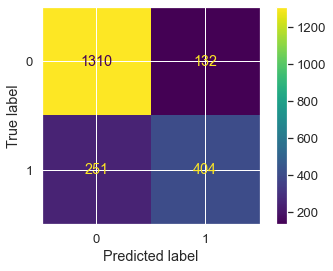

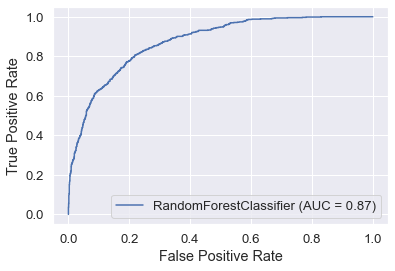

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1442
           1       0.75      0.62      0.68       655

    accuracy                           0.82      2097
   macro avg       0.80      0.76      0.78      2097
weighted avg       0.81      0.82      0.81      2097

Accuracy Score:  0.7777777777777778


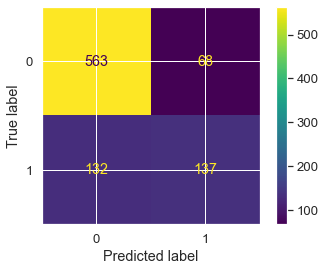

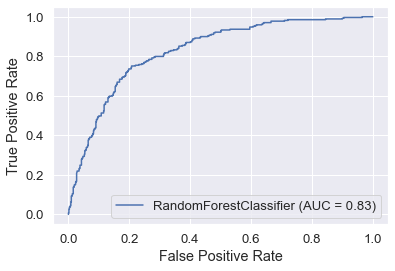

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       631
           1       0.67      0.51      0.58       269

    accuracy                           0.78       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.77      0.78      0.77       900



In [318]:
# Prediction & Evaluation on Train Data

ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

eval_models(best_grid,x_train,y_train,ytrain_predict)

# Prediction & Evaluation on Test Data
eval_models(best_grid,x_test,y_test,ytest_predict)

In [319]:
# Predicting the Training and Testing data

ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [320]:
# RF Model Performance Evaluation on Training data

confusion_matrix(y_train,ytrain_predict)

array([[1310,  132],
       [ 251,  404]], dtype=int64)

In [321]:
rf_train_acc=best_grid.score(x_train,y_train) 
rf_train_acc

0.8173581306628517

In [322]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1442
           1       0.75      0.62      0.68       655

    accuracy                           0.82      2097
   macro avg       0.80      0.76      0.78      2097
weighted avg       0.81      0.82      0.81      2097



In [323]:
rf_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.75
rf_train_recall  0.62
rf_train_f1  0.68


Area under Curve is 0.8746874040507776


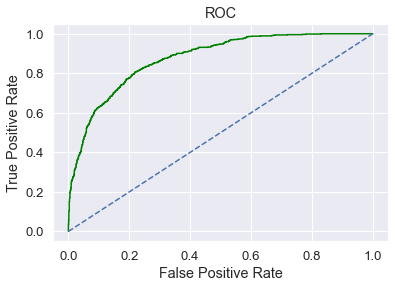

In [324]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid.predict_proba(x_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [325]:
# RF Model Performance Evaluation on Test data

confusion_matrix(y_test,ytest_predict)

array([[563,  68],
       [132, 137]], dtype=int64)

In [326]:
rf_test_acc=best_grid.score(x_test,y_test)
rf_test_acc

0.7777777777777778

In [327]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       631
           1       0.67      0.51      0.58       269

    accuracy                           0.78       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.77      0.78      0.77       900



In [328]:
rf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.67
rf_test_recall  0.51
rf_test_f1  0.58


Area under Curve is 0.8283305545572908


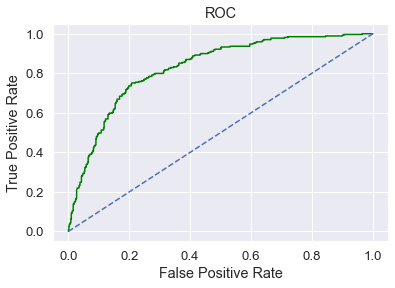

In [329]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid.predict_proba(x_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [330]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.344832
Product Name  0.187305
Sales         0.186909
Commision     0.098503
Duration      0.087678
Age           0.059445
Type          0.024485
Destination   0.010150
Channel       0.000693


### Build a Neural Network Classifier

### Grid Search CV

In [331]:
param_grid = {
    'hidden_layer_sizes': [600, 800], # 50, 200
    'max_iter': [5000, 7000], #5000,2500
    'solver': ['sgd'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [332]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'hidden_layer_sizes': 800, 'max_iter': 5000, 'solver': 'sgd', 'tol': 0.01}

In [333]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=800, max_iter=5000, random_state=1,
              solver='sgd', tol=0.01)

Accuracy Score:  0.7792083929422985


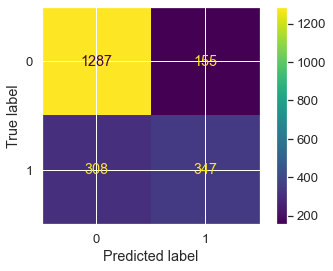

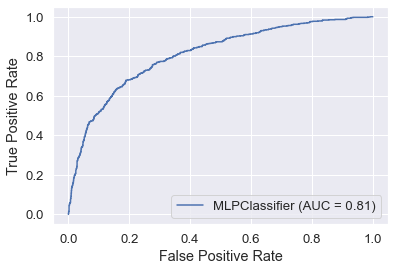

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1442
           1       0.69      0.53      0.60       655

    accuracy                           0.78      2097
   macro avg       0.75      0.71      0.72      2097
weighted avg       0.77      0.78      0.77      2097

Accuracy Score:  0.7622222222222222


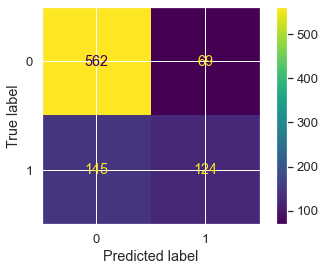

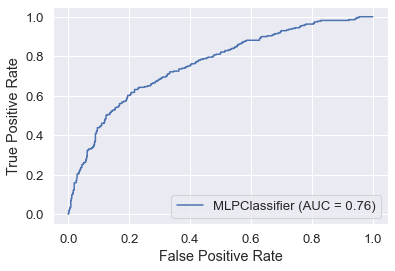

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       631
           1       0.64      0.46      0.54       269

    accuracy                           0.76       900
   macro avg       0.72      0.68      0.69       900
weighted avg       0.75      0.76      0.75       900



In [334]:
# Prediction & Evaluation on Train Data

ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

eval_models(best_grid,x_train,y_train,ytrain_predict)

# Prediction & Evaluation on Test Data
eval_models(best_grid,x_test,y_test,ytest_predict)

In [335]:
# NN Model Performance Evaluation on Training data
confusion_matrix(y_train,ytrain_predict)

array([[1287,  155],
       [ 308,  347]], dtype=int64)

In [336]:
nn_train_acc=best_grid.score(x_train,y_train) 
nn_train_acc

0.7792083929422985

In [337]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1442
           1       0.69      0.53      0.60       655

    accuracy                           0.78      2097
   macro avg       0.75      0.71      0.72      2097
weighted avg       0.77      0.78      0.77      2097



In [338]:
nn_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.69
nn_train_recall  0.53
nn_train_f1  0.6


Area under Curve is 0.8100094228753534


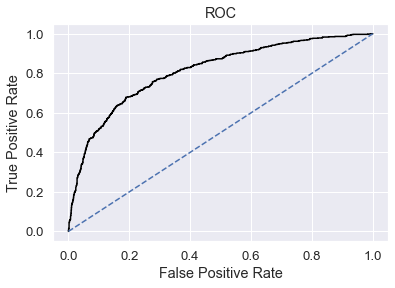

In [339]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(x_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid.predict_proba(x_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [340]:
# NN Model Performance Evaluation on Test data

nn_test_acc=best_grid.score(x_test,y_test)
nn_test_acc

0.7622222222222222

In [341]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       631
           1       0.64      0.46      0.54       269

    accuracy                           0.76       900
   macro avg       0.72      0.68      0.69       900
weighted avg       0.75      0.76      0.75       900



In [342]:
nn_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.64
nn_test_recall  0.46
nn_test_f1  0.54


Area under Curve is 0.7596486370250797


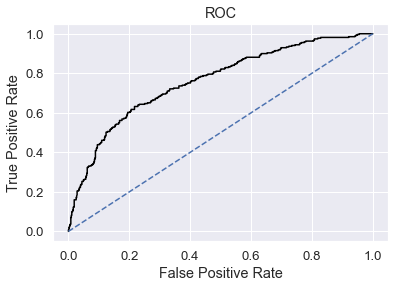

In [343]:
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(x_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid.predict_proba(x_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [344]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=800, max_iter=5000, random_state=1,
              solver='sgd', tol=0.01)>

### Comparison of the performance metrics from the 3 models

In [345]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.77,0.82,0.78,0.78,0.76
AUC,0.83,0.80,0.87,0.83,0.81,0.76
Recall,0.56,0.49,0.62,0.51,0.53,0.46
Precision,0.71,0.66,0.75,0.67,0.69,0.64
F1 Score,0.62,0.56,0.68,0.58,0.60,0.54


### ROC Curve for the 3 models on the Training data

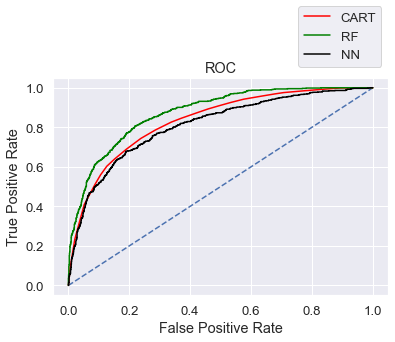

In [346]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### ROC Curve for the 3 models on the Test data

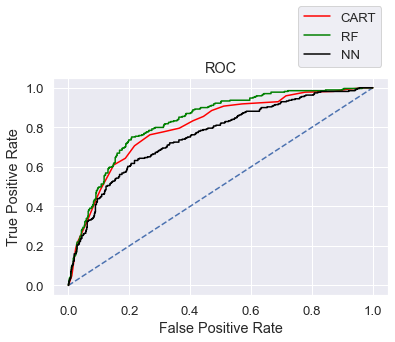

In [347]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')